# Airline Passenger Satisfaction

Problem Statment :  The goal of this project is to develop a machine learning model that accurately predicts whether a passenger is satisfied or dissatisfied with their airline. By analyzing and modeling passenger satisfaction, airline can improve customer service and address key factors that impact ouerall experience, leading to better business outcomes and enhanced customer retention.

## Importing Libraries

In [2]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For data visualization

import scipy.stats as stats  # For statistical functions

import warnings  # To handle warnings
warnings.filterwarnings("ignore")  # Ignore warnings


## Loading Data

In [3]:
data = pd.read_csv("airline_passenger_satisfaction.csv")
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## Information about DATA

In [4]:
data.shape

(129880, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

## Quick Overview of Data

In [6]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Missing Value Check

In [7]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [8]:
# Calculate the percentage of missing values in each column
print("The Percentage of missing values in Arrival Delay column : ",data['Arrival Delay'].isnull().mean().round(5) * 100)

The Percentage of missing values in Arrival Delay column :  0.303


*From the above it is seen that in "ARRIVAL DELAY"there are 393 missing values or only 3% Missing values.Here to overcome the situation we replace the missing values by the median of the other values in that particular feature column because this column have Outliers.*

## Handling Missing Values

In [9]:
data['Arrival Delay'].fillna(data['Arrival Delay'].median(), inplace=True)

In [10]:
data.isna().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

*This data contains 129880 rows and 24 columns, with SATISFACTION as the Target. There are 23 feature columns and 1 Binary column or Traget variables. Out of all features columns, 14 are survey entries where passengers rate the flight experience on a scale of 1 to 5. However there are also some survey entries with a score 0, which is infer to be unfilled survey question*

*SATISFACTION Satisfaction is a direct reaction to sonsumption, while service quality is defined as the customer's overall impression of the service provided. Planned and perceived service quality have an effect on service qualit. Customers will be satisfied to be vary good if the service matcher theit standard.*

In [11]:
# To check the Satisfaction and Dissatisfied rate
def pivot_satisfaction (data, target):

    df_pivot = pd.pivot_table(
        data[["ID", target, "Satisfaction"]],
        index = [target],
        columns = ["Satisfaction"],
        aggfunc = "count",
        fill_value =0).reset_index()

    df_pivot.columns = [target, "Neutral or Dissatisfied", "Satisfied"]

    df_pivot["total"] = df_pivot["Satisfied"]+df_pivot["Neutral or Dissatisfied"]
    df_pivot["Dissatisfied_rate"] = df_pivot["Neutral or Dissatisfied"]/df_pivot["total"]*100
    return df_pivot

In [12]:
# This is test for Chi-square test for independent test
def chi2_conti(col):
    chi2, p, dof, expected = stats.chi2_contingency(pivot_satisfaction(data, col).drop([col, 'total', 'Dissatisfied_rate'], axis=1))

    # Print the results in a readable format
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected.round(2))

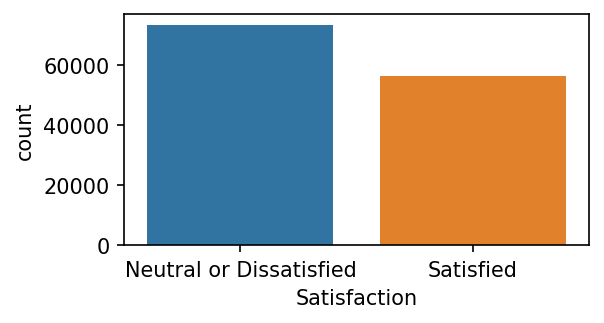

In [13]:
plt.figure(figsize=(4,2),dpi = 150)
sns.countplot(x="Satisfaction",data = data);

In [14]:
data["Satisfaction"].value_counts()

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

**OVERVIEW**

 *The distribution of the target column is quite balance, so we can use EDA and fit classification model with the dependent variable. If the data was Imbalanced then we use over-sampling, under-sampling and SMOTE*

# Exploratory Data Analysis

### 1.  Gender VS Satisfaction

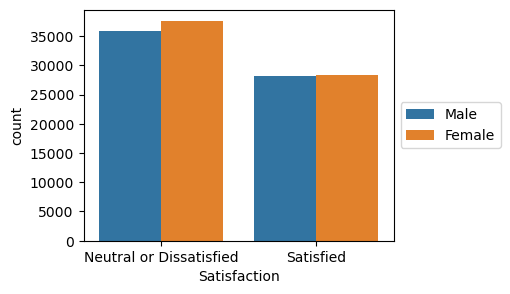

In [15]:
plt.figure(figsize=(4,3),dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Gender")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [16]:
pivot_satisfaction(data,"Gender")

,Gender,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,Female,37630,28269,65899,57.102536
1,Male,35822,28159,63981,55.988497


*From this figure it appers that the satistaction level for both gender were relatively similar, with over 55% of individuals from both genders reporting that they were not satisfied with the service.*

In [17]:
chi2_conti("Gender")

Chi-Square Statistic: 16.35208067667909
p-value: 5.259838493340003e-05
Degrees of Freedom: 1
Expected Frequencies:
[[37268.35 28630.65]
 [36183.65 27797.35]]


Hear P-value is less then 0.05 so we reject the null hypothesis (Null Hypothesis is Gender and Satisfaction is Dependent).

### 2.  Age Group VS Satisfaction

**AGE GROUP** *gives information about the age of the passenger. It is numeric variable. The age ranges between 7 and 85, with mean 39. We converted in the three group Young, middle age and senior, young is less than 40, middle age is between 40 to 60 and senior is gater than 60.*

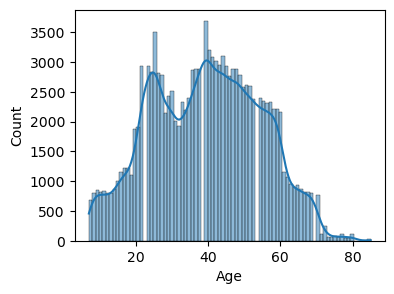

In [18]:
plt.figure(figsize=(4,3),dpi = 100)
sns.histplot(data=data, x = 'Age',kde= True);

In [19]:

def age_group (row):   # convert Numerical variable to Categorical Variable  for performing EDA
    if row < 40:
        return "Young"
    if (row >= 40) & (row < 60):
        return "middle age"
    if row >= 60:
        return "senior"
    else:
        return "no age"

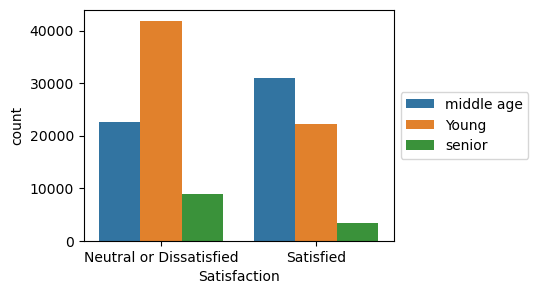

In [20]:
data['age_group'] = data['Age'].apply(lambda x :age_group(x))
plt.figure(figsize=(4,3),dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="age_group")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [21]:
pivot_satisfaction(data,"age_group")

,age_group,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,Young,41864,22199,64063,65.348173
1,middle age,22679,30923,53602,42.309988
2,senior,8909,3306,12215,72.934916


*Doing so revels that for those under 40, the of dissatisfaction is over 65%. For those between 40 to 60, the dissatisfaction drops to 42%. However for over 60 dissatisfaction is over 70%*

In [22]:
chi2_conti("age_group")

Chi-Square Statistic: 7776.6416270129075
p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[36230.02 27832.98]
 [30313.94 23288.06]
 [ 6908.04  5306.96]]


*Hear P-value is less then 0.05 so we reject the null hypothesis (Null Hypothesis is Age group and Satisfaction is Dependent).*

In [23]:
data = data.drop('age_group', axis= 1)

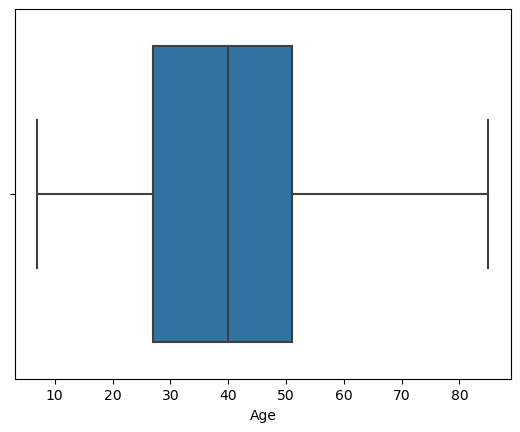

In [24]:
sns.boxplot(data = data, x= 'Age');

 *The "Age" column in your dataset does not contain any outliers.*

### 3.  Customer Type VS Satisfaction

**Customer Type** *gives information about the loyality of the coustomers and takes values{First time customer, Returning Customer}. It has been considered as a factor variable*

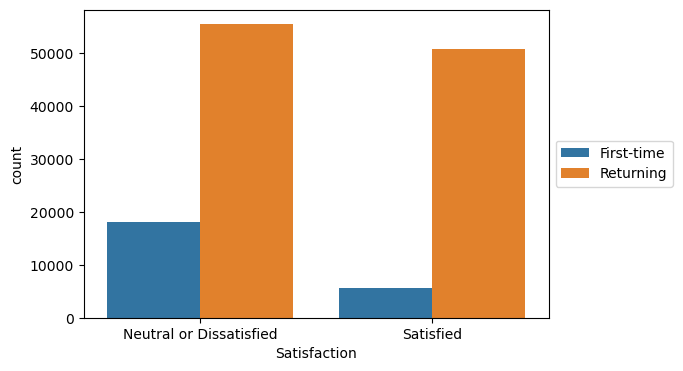

In [25]:
plt.figure(figsize=(6,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data, hue="Customer Type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

*There is a high number of Returning customers that are dissatisfied with the services. Their lack of satisfaction suggests that the service may have changed recently or that the service is failing to meet the transforming market. As Returning customer's opinio are most better than the first time customer of business and as such if the service does not improve, the business may face difficulty.*

In [26]:
pivot_satisfaction(data,"Customer Type")

,Customer Type,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,First-time,18080,5700,23780,76.030278
1,Returning,55372,50728,106100,52.188501


*From the table it is cleat that over 76% of first time customer stated they were dissatisfied with the service.*

In [27]:
chi2_conti("Customer Type")

Chi-Square Statistic: 4493.188803283598
p-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[13448.48 10331.52]
 [60003.52 46096.48]]


*Hear P-value is less then 0.05 so we reject the null hypothesis (Null Hypothesis is Customer Type and Satisfaction is Dependent).*

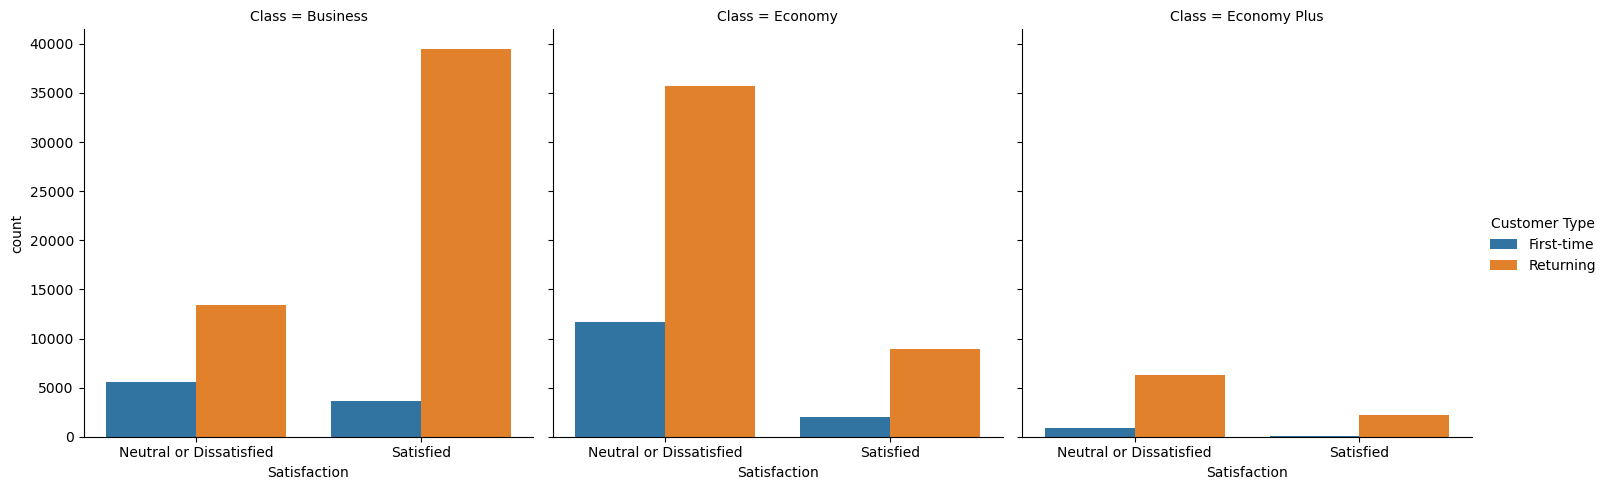

In [28]:
sns.catplot(x="Satisfaction",data = data, hue="Customer Type", col = 'Class', kind = 'count');

*We see the the count plot most of the Returning Customer of Economy Class or economy plus, where Business customers are more Satisfied.*

### 4.  Type of Travel VS Satisfaction

**Type of Travel** *gives us information about the type of trave takes values {Personal travel, Business travel}*

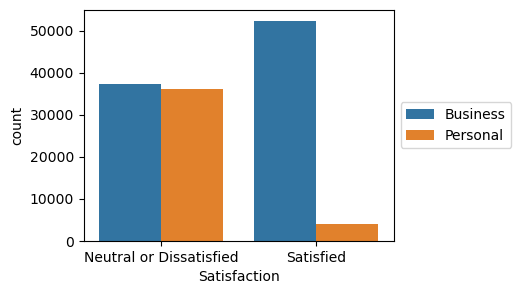

In [29]:
plt.figure(figsize=(4,3), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Type of Travel")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [30]:
pivot_satisfaction(data,"Type of Travel")

,Type of Travel,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,Business,37337,52356,89693,41.627552
1,Personal,36115,4072,40187,89.867370


*Type of business provides revealing insight into the operations of the airline. It appears that it may specialise in business travellers as the large share of the passengers utilised the airline for business travel. Furthermore, such travellers were more likely to find the service satisfactory. However, those who travelled for personal reasons found the experience extremely poor, approx. 90%. This is concerning and the airline should examine the issues relating to their service and rectify any issues with the utmost urgency, if they wish to retain customers.*

In [31]:
chi2_conti("Type of Travel")

Chi-Square Statistic: 26282.520993423812
p-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[50724.75 38968.25]
 [22727.25 17459.75]]


*Hear P-value is less then 0.05 so we reject the null hypothesis (Null Hypothesis is Type of Travel and Satisfaction is Dependent).*

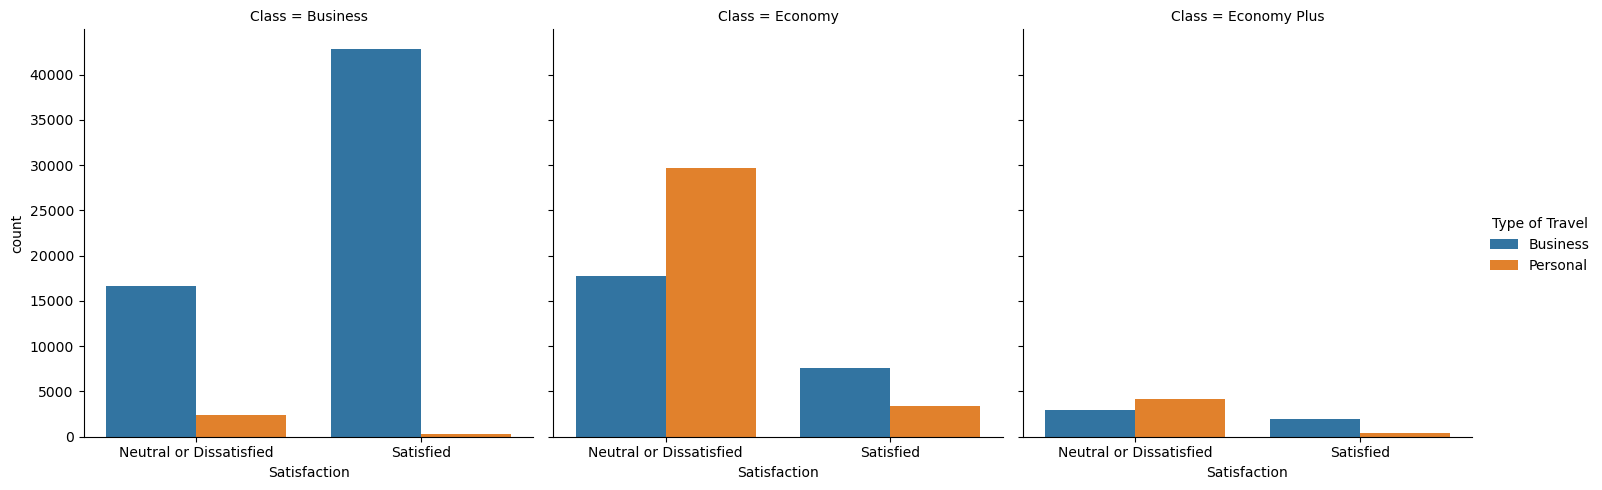

In [32]:
sns.catplot(x="Satisfaction",data = data,hue="Type of Travel", col = 'Class', kind = 'count');

*Most of the Business Person travel in Business Class so they are more satisfied.*

### 5.  Class VS Satisfaction

**Class** *gives information about the class in which the passenger travelled and takes values {Economy, Economy Plus, Business}*

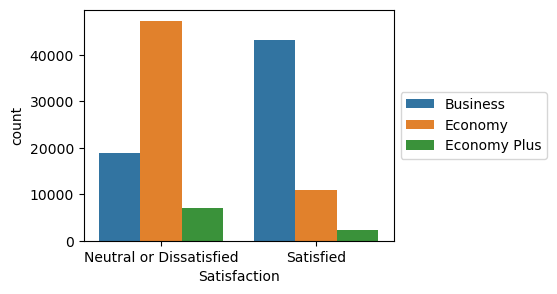

In [33]:
plt.figure(figsize=(4,3), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Class")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [34]:
pivot_satisfaction(data,"Class")

,Class,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,Business,18994,43166,62160,30.556628
1,Economy,47366,10943,58309,81.232743
2,Economy Plus,7092,2319,9411,75.358623


*Classes highlight the dominance of business travel, as most business class travelers were satisfied with the service. In contrast, economy class passengers were largely dissatisfied, with 81% expressing dissatisfaction, and in economy plus, the dissatisfaction rate was 75%. Since 45% of passengers traveled in economy class, the airline should focus on improving services in this area.*

*Even business travelers using economy class were disappointed. The poor quality of economy class also seems to be a major factor in the low ratings from those traveling for personal reasons, who were more likely to use economy class.*

In [35]:
chi2_conti("Class")

Chi-Square Statistic: 32906.17185866312
p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[35153.81 27006.19]
 [32975.92 25333.08]
 [ 5322.27  4088.73]]


*Hear P-value is less then 0.05 so we reject the null hypothesis (Null Hypothesis is Class and Satisfaction is Dependent).*

### 6.  Distance group VS Satisfaction

**Flight Distance** *gives the information about travel distance in KM. It is numeric variable and takes values the range between 31 to 5000 KM, with an avverage flight distance is 1190 an median is 844. Chenge numerical to categorical variable with two categories*

In [36]:
def distance_group (row):
    if row < 1500:
        return "less than 1500"    #change numeric  variable to categorical variable for EDA
    else:
        return "grater than 1500"

data["distance_group"] = data["Flight Distance"].apply(lambda row: distance_group(row))

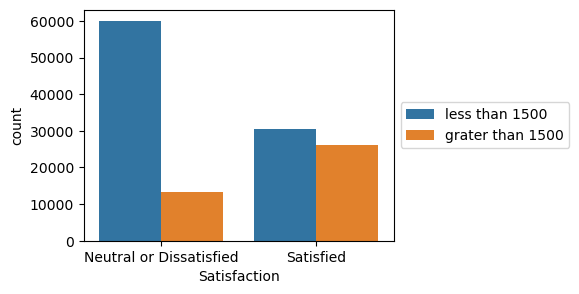

In [37]:
plt.figure(figsize=(4,3), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="distance_group")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

<Figure size 400x300 with 0 Axes>

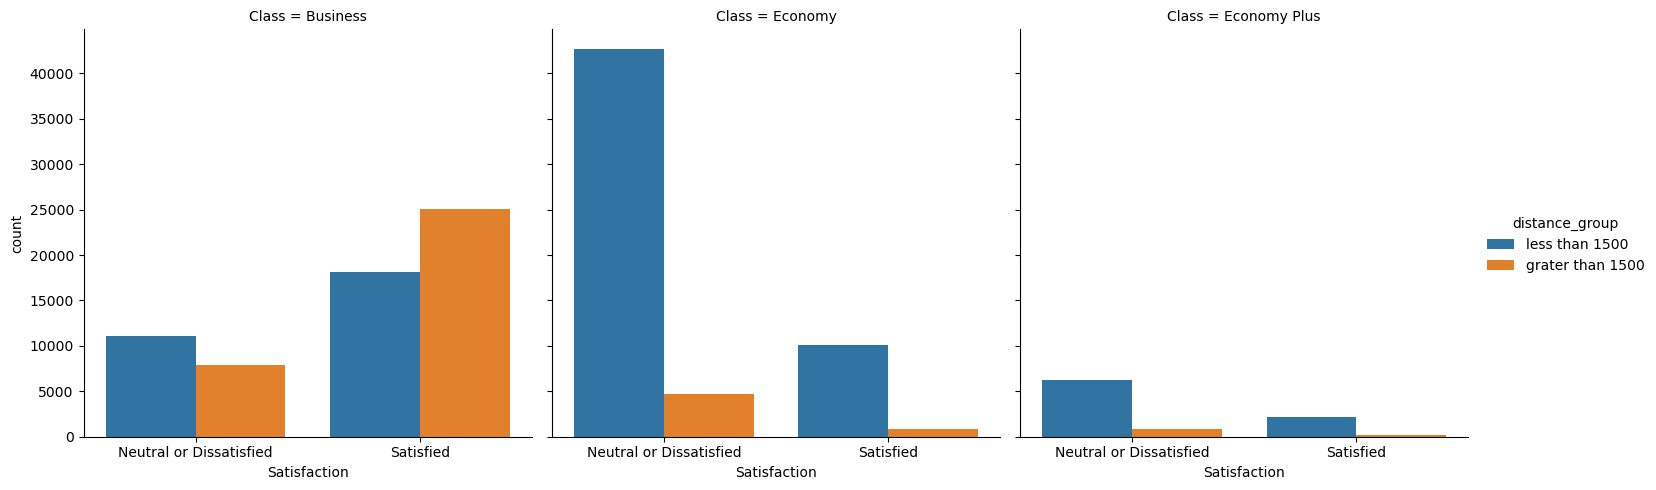

In [38]:
plt.figure(figsize=(4,3), dpi = 100)
sns.catplot(x="Satisfaction",data = data,hue="distance_group", col ='Class',
            kind="count")


*Long Distance travel are *

In [39]:
pivot_satisfaction(data,"distance_group")

,distance_group,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,grater than 1500,13376,26023,39399,33.95010
1,less than 1500,60076,30405,90481,66.39626


In [40]:
chi2_conti("distance_group")

Chi-Square Statistic: 11758.838441419233
p-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[22281.61 17117.39]
 [51170.39 39310.61]]


*Hear P-value is less then 0.05 so we reject the null hypothesis (Null Hypothesis is flight distance group and Satisfaction is Dependent).*

In [41]:
data = data.drop('distance_group', axis= 1)

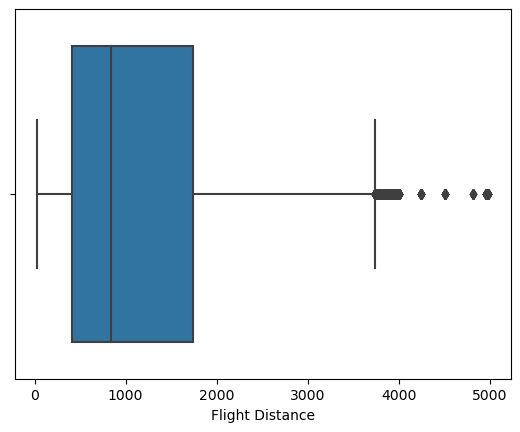

In [42]:
sns.boxplot(data = data, x ="Flight Distance" );

*The "Flight Distance" column in my dataset contains outliers. So remove the outliers. Using IQR method*

### 7.  Departure Delay VS Satisfaction

In [43]:
def Departure_Delay (row):
    if row < 7:
        return "less than 7"
    if (row >= 7) & (row <=14):
        return "between 7 to 14"
    else:
        return "grater than 14"

data["Departure_Delay_grp"] = data["Departure Delay"].apply(lambda row: Departure_Delay(row))

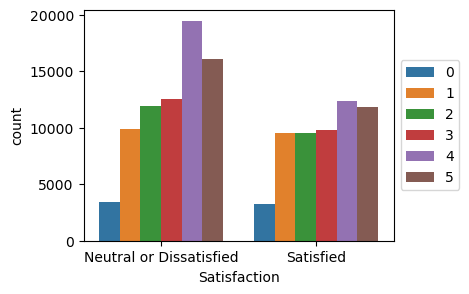

In [44]:
plt.figure(figsize=(4,3), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Departure and Arrival Time Convenience")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [45]:
pivot_satisfaction(data,"Departure_Delay_grp")

,Departure_Delay_grp,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,between 7 to 14,6479,4804,11283,57.422671
1,grater than 14,18764,11076,29840,62.882038
2,less than 7,48209,40548,88757,54.315716


In [46]:
chi2_conti('Departure_Delay_grp')

Chi-Square Statistic: 670.7616243605972
p-value: 2.218012216564413e-146
Degrees of Freedom: 2
Expected Frequencies:
[[ 6380.96  4902.04]
 [16875.64 12964.36]
 [50195.4  38561.6 ]]


*Hear P-value is less then 0.05 so we reject the null hypothesis (Null Hypothesis is Departure Delay group and Satisfaction is Dependent).*

In [47]:
data = data.drop("Departure_Delay_grp",axis=1)

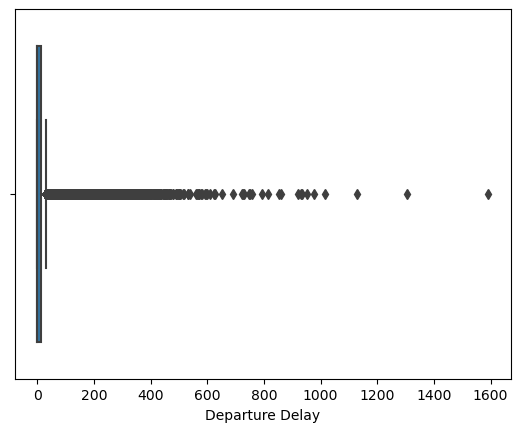

In [48]:
sns.boxplot(data = data, x = 'Departure Delay');

*The "Departure Delay" column in my dataset contains outliers. So remove the outliers. Using IQR method*

### 8.  Arrival Delay VS Satisfaction

In [49]:
def Arrival_Delay (row):
    if row < 7:
        return "less than 7"
    if (row >= 7) & (row <=14):
        return "between 7 to 14"
    else:
        return "grater than 14"
data["Arrival_Delay_group"] = data["Arrival Delay"].apply(lambda row: Arrival_Delay(row))

In [50]:
pivot_satisfaction(data,"Arrival_Delay_group")

,Arrival_Delay_group,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,between 7 to 14,7652,4221,11873,64.448749
1,grater than 14,19628,10980,30608,64.127026
2,less than 7,46172,41227,87399,52.828980


In [51]:
chi2_conti('Arrival_Delay_group')

Chi-Square Statistic: 1509.1802147641695
p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[ 6714.63  5158.37]
 [17309.97 13298.03]
 [49427.4  37971.6 ]]


*Hear P-value is less then 0.05 so we reject the null hypothesis (Null Hypothesis is Arrival Delay group and Satisfaction is Dependent).*

In [52]:
data = data.drop('Arrival_Delay_group', axis= 1)

<Axes: xlabel='Arrival Delay'>

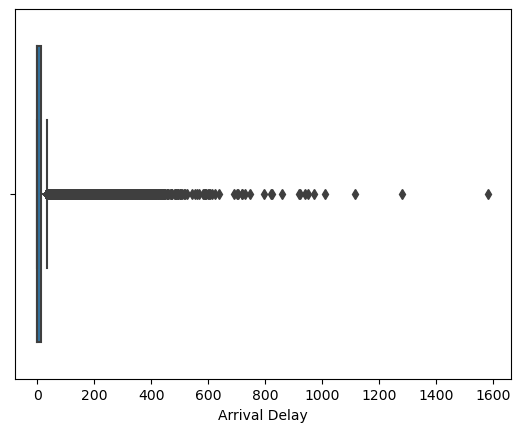

In [53]:
sns.boxplot(data = data, x = "Arrival Delay")

*The "Arrival Delay" column in my dataset contains outliers. So remove the outliers. Using IQR method*

### 9.  Departure and Arrival  Time Convenicence VS Satisfaction

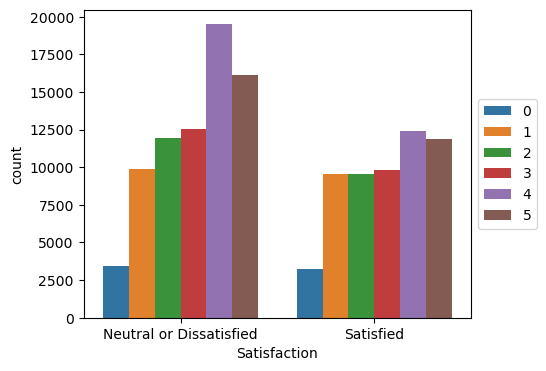

In [54]:
plt.figure(figsize=(5,4), dpi=100)
sns.countplot(x="Satisfaction",data = data,hue="Departure and Arrival Time Convenience")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [55]:
pivot_satisfaction(data,"Departure and Arrival Time Convenience")

,Departure and Arrival Time Convenience,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,3467,3214,6681,51.893429
1,1,9891,9518,19409,50.960894
2,2,11957,9577,21534,55.526145
3,3,12539,9839,22378,56.032711
4,4,19491,12389,31880,61.138645
5,5,16107,11891,27998,57.529109


In [56]:
chi2_conti("Departure and Arrival Time Convenience")

Chi-Square Statistic: 601.462958170054
p-value: 9.767302052551637e-128
Degrees of Freedom: 5
Expected Frequencies:
[[ 3778.36  2902.64]
 [10976.52  8432.48]
 [12178.28  9355.72]
 [12655.6   9722.4 ]
 [18029.33 13850.67]
 [15833.92 12164.08]]


*Hear P-value is less then 0.05 so we reject the null hypothesis (Null Hypothesis is "Departure and Arrival Time Convenience" and Satisfaction is Dependent).*

### 10.  Ease of Online Booking VS Satisfaction

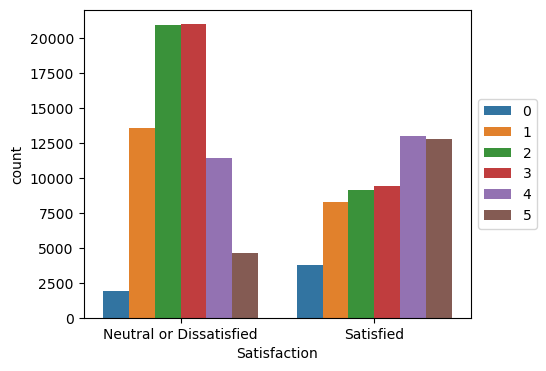

In [57]:
plt.figure(figsize=(5,4), dpi=100)
sns.countplot(x="Satisfaction",data = data,hue="Ease of Online Booking")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [58]:
pivot_satisfaction(data,"Ease of Online Booking")

,Ease of Online Booking,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,1900,3782,5682,33.438930
1,1,13581,8305,21886,62.053367
2,2,20931,9120,30051,69.651592
3,3,20968,9425,30393,68.989570
4,4,11449,12995,24444,46.837670
5,5,4623,12801,17424,26.532369


*Hear P-value is less then 0.05 so we reject the null hypothesis (Null Hypothesis is "Ease of Online Booking" and Satisfaction is Dependent).*

### 11.  Check in Service VS Satisfaction

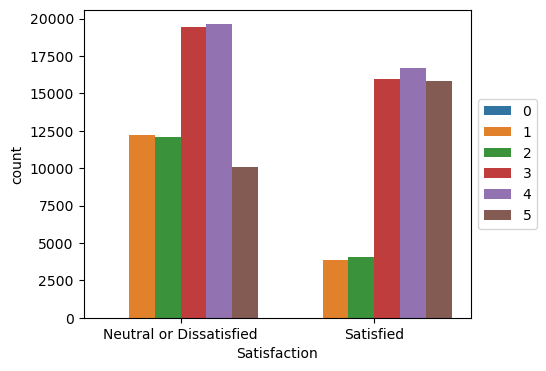

In [59]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Check-in Service")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [60]:
pivot_satisfaction(data,"Check-in Service")

,Check-in Service,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,1,0,1,100.000000
1,1,12249,3859,16108,76.042960
2,2,12062,4040,16102,74.909949
3,3,19471,15982,35453,54.920599
4,4,19619,16714,36333,53.997743
5,5,10050,15833,25883,38.828575


In [61]:
chi2_conti("Check-in Service")

Chi-Square Statistic: 8143.77321636242
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[5.700000e-01 4.300000e-01]
 [9.109680e+03 6.998320e+03]
 [9.106280e+03 6.995720e+03]
 [2.005000e+04 1.540300e+04]
 [2.054767e+04 1.578533e+04]
 [1.463781e+04 1.124519e+04]]


### 12.  Online Boarding VS Satisfaction

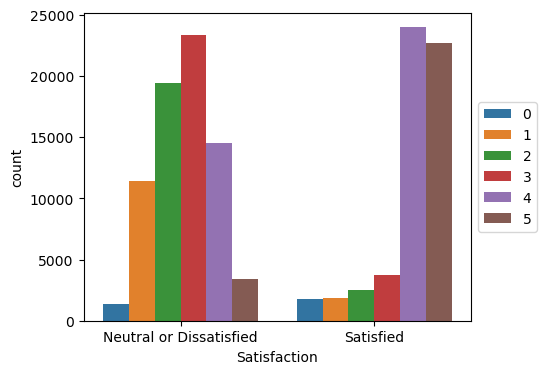

In [62]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Online Boarding")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [63]:
pivot_satisfaction(data,"Online Boarding")


,Online Boarding,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,1341,1739,3080,43.538961
1,1,11434,1827,13261,86.222758
2,2,19422,2512,21934,88.547461
3,3,23385,3732,27117,86.237416
4,4,14502,23966,38468,37.698867
5,5,3368,22652,26020,12.943889


In [64]:
chi2_conti("Online Boarding")

Chi-Square Statistic: 49531.21839635691
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[ 1741.86  1338.14]
 [ 7499.59  5761.41]
 [12404.5   9529.5 ]
 [15335.68 11781.32]
 [21755.09 16712.91]
 [14715.28 11304.72]]


### 13.  Gate Location VS Satisfaction

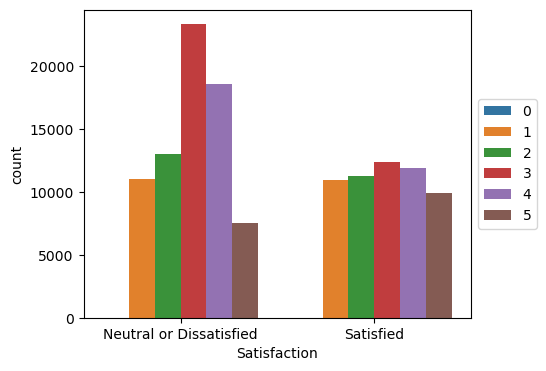

In [65]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Gate Location")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [66]:
pivot_satisfaction(data,"Gate Location")

,Gate Location,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,0,1,1,0.000000
1,1,11020,10971,21991,50.111409
2,2,13028,11268,24296,53.621995
3,3,23321,12396,35717,65.293838
4,4,18563,11903,30466,60.930217
5,5,7520,9889,17409,43.196048


In [67]:
chi2_conti("Gate Location")

Chi-Square Statistic: 3069.907991724218
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[5.700000e-01 4.300000e-01]
 [1.243673e+04 9.554270e+03]
 [1.374030e+04 1.055570e+04]
 [2.019930e+04 1.551770e+04]
 [1.722966e+04 1.323634e+04]
 [9.845440e+03 7.563560e+03]]


### 14.  On board Service VS Satisfaction

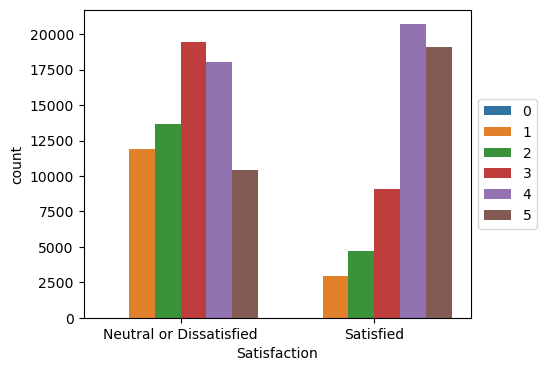

In [68]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="On-board Service")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [69]:
pivot_satisfaction(data,"On-board Service")

,On-board Service,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,5,0,5,100.000000
1,1,11879,2908,14787,80.334077
2,2,13663,4688,18351,74.453708
3,3,19463,9079,28542,68.190736
4,4,18013,20690,38703,46.541612
5,5,10429,19063,29492,35.362132


In [70]:
chi2_conti("On-board Service")

Chi-Square Statistic: 14342.659690425951
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[2.830000e+00 2.170000e+00]
 [8.362600e+03 6.424400e+03]
 [1.037818e+04 7.972820e+03]
 [1.614157e+04 1.240043e+04]
 [2.188799e+04 1.681501e+04]
 [1.667883e+04 1.281317e+04]]


### 15.  Seat Confort VS Satisfaction

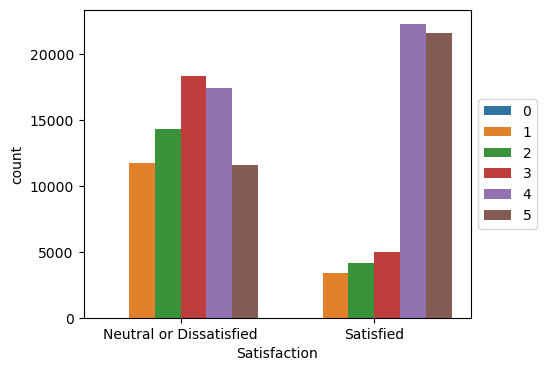

In [71]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Seat Comfort")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [72]:
pivot_satisfaction(data,"Seat Comfort")

,Seat Comfort,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,1,0,1,100.000000
1,1,11734,3374,15108,77.667461
2,2,14341,4188,18529,77.397593
3,3,18334,4994,23328,78.592250
4,4,17481,22275,39756,43.970721
5,5,11561,21597,33158,34.866397


In [73]:
chi2_conti("Seat Comfort")

Chi-Square Statistic: 19538.740376260714
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[5.700000e-01 4.300000e-01]
 [8.544140e+03 6.563860e+03]
 [1.047884e+04 8.050160e+03]
 [1.319286e+04 1.013514e+04]
 [2.248351e+04 1.727249e+04]
 [1.875209e+04 1.440591e+04]]


### 16.   Leg Room Service VS Satisfaction

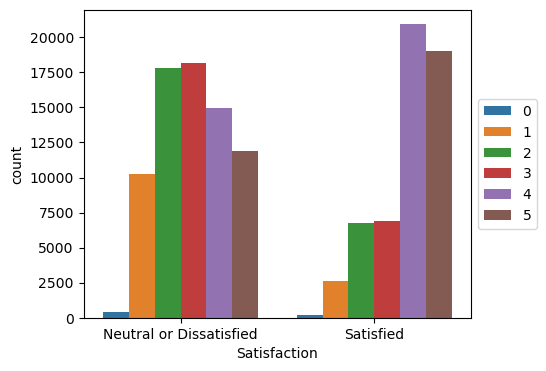

In [74]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Leg Room Service")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [75]:
pivot_satisfaction(data,"Leg Room Service")

,Leg Room Service,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,392,206,598,65.551839
1,1,10263,2632,12895,79.588988
2,2,17785,6755,24540,72.473513
3,3,18139,6917,25056,72.393838
4,4,14961,20925,35886,41.690353
5,5,11912,18993,30905,38.543925


In [76]:
chi2_conti("Leg Room Service")

Chi-Square Statistic: 15200.778756074234
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[  338.19   259.81]
 [ 7292.61  5602.39]
 [13878.29 10661.71]
 [14170.11 10885.89]
 [20294.88 15591.12]
 [17477.93 13427.07]]


### 17.  Cleanliness VS Satisfaction

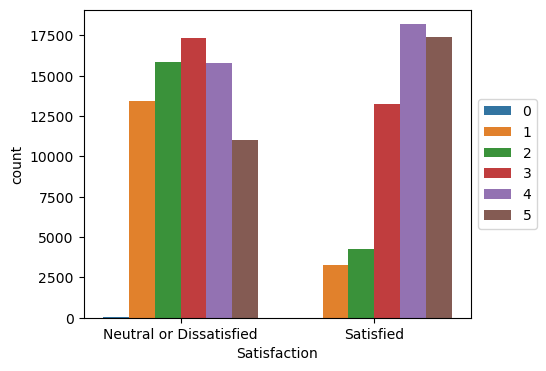

In [77]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Cleanliness")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [78]:
pivot_satisfaction(data,"Cleanliness")

,Cleanliness,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,14,0,14,100.000000
1,1,13434,3295,16729,80.303664
2,2,15836,4277,20113,78.735146
3,3,17370,13269,30639,56.692451
4,4,15786,18183,33969,46.471783
5,5,11012,17404,28416,38.752815


In [79]:
chi2_conti("Cleanliness")

Chi-Square Statistic: 12948.918125498116
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[7.920000e+00 6.080000e+00]
 [9.460880e+03 7.268120e+03]
 [1.137465e+04 8.738350e+03]
 [1.732750e+04 1.331150e+04]
 [1.921074e+04 1.475826e+04]
 [1.607031e+04 1.234569e+04]]


### 18.  Food and Drink VS Satisfaction

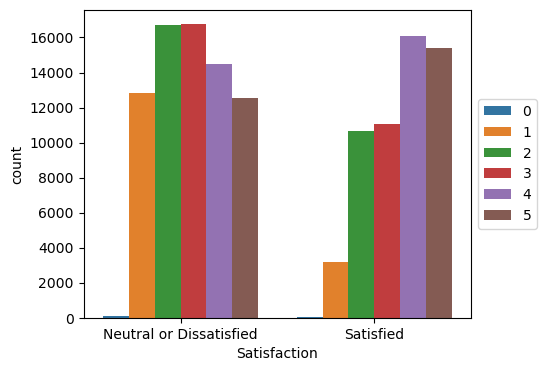

In [80]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Food and Drink")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [81]:
pivot_satisfaction(data,"Food and Drink")

,Food and Drink,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,77,55,132,58.333333
1,1,12848,3203,16051,80.044857
2,2,16731,10652,27383,61.099953
3,3,16748,11046,27794,60.257610
4,4,14492,16071,30563,47.416811
5,5,12556,15401,27957,44.911829


In [82]:
chi2_conti("Food and Drink")

Chi-Square Statistic: 6571.202895062374
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[   74.65    57.35]
 [ 9077.44  6973.56]
 [15486.11 11896.89]
 [15718.55 12075.45]
 [17284.52 13278.48]
 [15810.73 12146.27]]


### 19.  In Flight Service VS Satisfaction

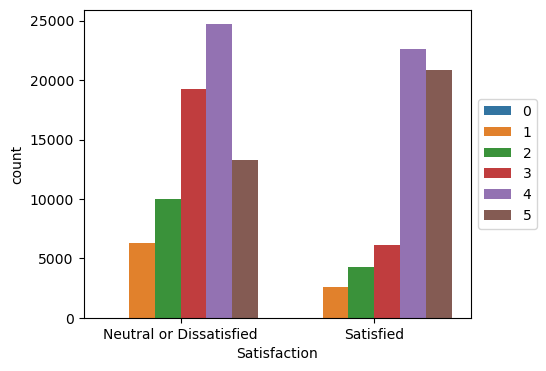

In [83]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="In-flight Service")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [84]:
pivot_satisfaction(data,"In-flight Service")

,In-flight Service,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,5,0,5,100.000000
1,1,6274,2588,8862,70.796660
2,2,10003,4305,14308,69.911937
3,3,19233,6083,25316,75.971717
4,4,24691,22632,47323,52.175475
5,5,13246,20820,34066,38.883344


In [85]:
chi2_conti("In-flight Service")

Chi-Square Statistic: 10357.930495326505
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[2.830000e+00 2.170000e+00]
 [5.011790e+03 3.850210e+03]
 [8.091710e+03 6.216290e+03]
 [1.431715e+04 1.099885e+04]
 [2.676293e+04 2.056007e+04]
 [1.926560e+04 1.480040e+04]]


### 20.  In Flight Wifi Service VS Satisfaction

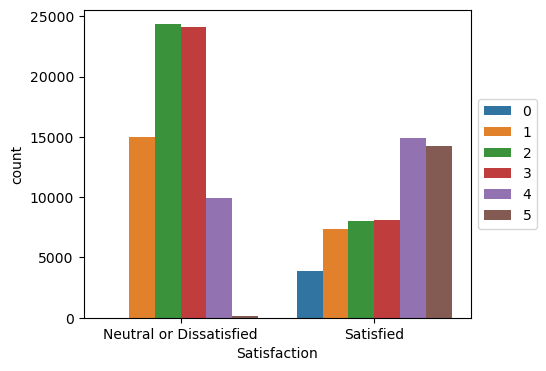

In [86]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="In-flight Wifi Service")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [87]:
pivot_satisfaction(data,"In-flight Wifi Service")

,In-flight Wifi Service,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,10,3906,3916,0.255363
1,1,15000,7328,22328,67.180222
2,2,24330,7990,32320,75.278465
3,3,24080,8105,32185,74.817462
4,4,9891,14884,24775,39.923310
5,5,141,14215,14356,0.982168


In [88]:
chi2_conti("In-flight Wifi Service")

Chi-Square Statistic: 35891.43336967039
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[ 2214.64  1701.36]
 [12627.32  9700.68]
 [18278.17 14041.83]
 [18201.82 13983.18]
 [14011.19 10763.81]
 [ 8118.86  6237.14]]


### 21.  In Flight Entertaiment VS Satisfaction

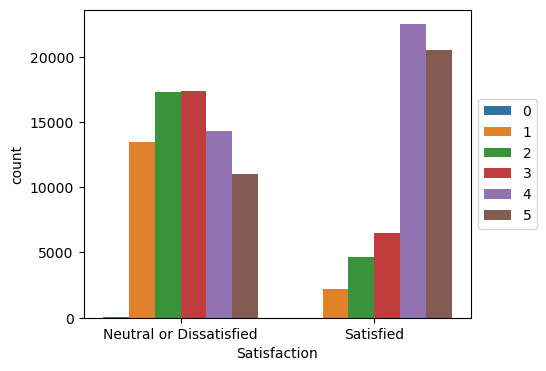

In [89]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="In-flight Entertainment")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [90]:
pivot_satisfaction(data,"In-flight Entertainment")

,In-flight Entertainment,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,0,18,0,18,100.000000
1,1,13450,2225,15675,85.805423
2,2,17296,4672,21968,78.732702
3,3,17360,6524,23884,72.684642
4,4,14307,22484,36791,38.887228
5,5,11021,20523,31544,34.938499


In [91]:
chi2_conti("In-flight Entertainment")

Chi-Square Statistic: 23071.602435454988
p-value: 0.0
Degrees of Freedom: 5
Expected Frequencies:
[[1.018000e+01 7.820000e+00]
 [8.864800e+03 6.810200e+03]
 [1.242373e+04 9.544270e+03]
 [1.350730e+04 1.037670e+04]
 [2.080669e+04 1.598431e+04]
 [1.783931e+04 1.370469e+04]]


### 22.  Baggage Handling VS Satisfaction

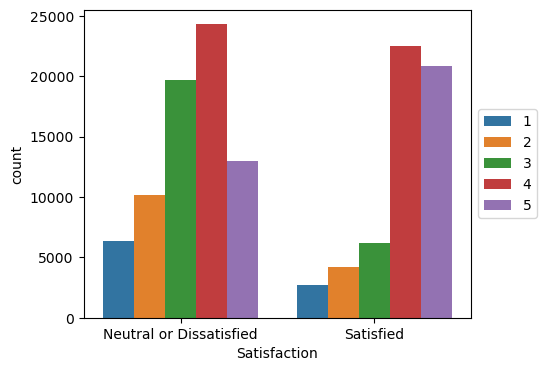

In [92]:
plt.figure(figsize=(5,4), dpi = 100)
sns.countplot(x="Satisfaction",data = data,hue="Baggage Handling")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [93]:
pivot_satisfaction(data,"Baggage Handling")

,Baggage Handling,Neutral or Dissatisfied,Satisfied,total,Dissatisfied_rate
0,1,6317,2711,9028,69.971201
1,2,10138,4224,14362,70.589054
2,3,19699,6152,25851,76.202081
3,4,24286,22475,46761,51.936443
4,5,13012,20866,33878,38.408407


In [94]:
chi2_conti("Baggage Handling")

Chi-Square Statistic: 10820.213522965987
p-value: 0.0
Degrees of Freedom: 4
Expected Frequencies:
[[ 5105.67  3922.33]
 [ 8122.25  6239.75]
 [14619.71 11231.29]
 [26445.1  20315.9 ]
 [19159.28 14718.72]]


## Correation Check for Multicolinearity

### Pearson correlation between numerical features..

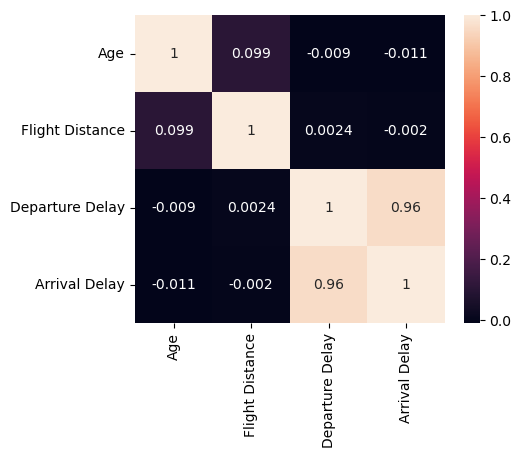

In [95]:
data_numeric = data[['Age','Flight Distance','Departure Delay','Arrival Delay']]
plt.figure(figsize=(5,4), dpi=100)
sns.heatmap(data_numeric.corr(),annot = True);

*There is an high correlation presents between Departure Delay and Arrival Delay. In this case our model suffer with multicollinearity problem, we can transform this two variable to one variable and other wise drop one variable.*

### Spearman Rank Correlation between Ordinal Features..

In [96]:
ordinal_data = data[['Departure and Arrival Time Convenience',
'Ease of Online Booking',
'Check-in Service',
'Online Boarding',
'Gate Location',
'On-board Service',
'Seat Comfort',
'Leg Room Service',
'Cleanliness',
'Food and Drink',
'In-flight Service',
'In-flight Wifi Service',
'In-flight Entertainment',
'Baggage Handling']]

ordinal_data = ordinal_data.rename(columns={'Departure and Arrival Time Convenience': "Dep & Arr Time Conv"})

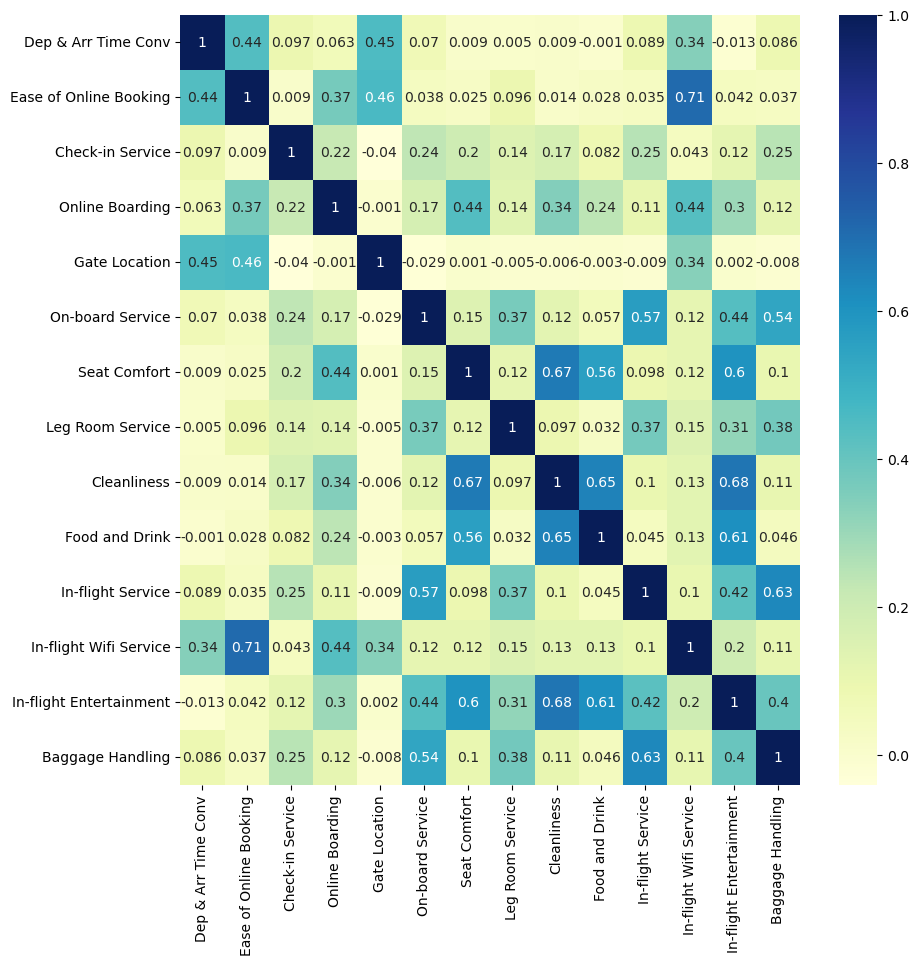

In [97]:
plt.figure(figsize=(10,10), dpi=100)
sns.heatmap(ordinal_data.corr(method = 'spearman').round(3),annot = True,cmap="YlGnBu");

*There is a high correlation between in flight wifi service and ease of online booking. so can drop or transform this columns.*

In [98]:
data.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [99]:
data = data.drop('ID',axis = 1)

In [100]:
data.sample(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
83560,Female,60,Returning,Business,Business,3533,0,5.0,4,4,...,5,4,5,5,5,5,4,5,5,Satisfied
31920,Female,24,First-time,Business,Economy,101,0,0.0,0,3,...,4,5,4,5,5,5,2,5,4,Neutral or Dissatisfied
77110,Female,44,Returning,Business,Business,1481,164,153.0,5,5,...,2,4,4,4,4,4,4,4,4,Neutral or Dissatisfied
60843,Female,15,First-time,Business,Business,1265,1,0.0,0,3,...,5,3,2,3,3,4,4,3,4,Satisfied
34031,Male,45,Returning,Business,Economy Plus,1617,6,0.0,1,1,...,3,4,2,4,4,1,4,4,3,Satisfied


## Feature Engineering



**Otlier detection and Removing**

In [101]:
def remove_outliers(df, col_list):
    df_clean = df.copy()
    for col in col_list:
        if pd.api.types.is_numeric_dtype(df_clean[col]):
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [102]:
data_clean = remove_outliers(data, ['Flight Distance','Departure Delay'])

**To drop the two columns ('Arrival delay' and 'Ease of online booking') from your dataset in order to reduce multicollinearity**

In [103]:
data_clean = data_clean.drop(['Arrival Delay', 'Ease of Online Booking' ], axis = 1)

In [104]:
data.shape

(129880, 23)

In [105]:
data_clean.shape

(109349, 21)

In [106]:
data.shape[0] - data_clean.shape[0]

20531

## Converting to Dummy Variable

In [107]:
df = pd.get_dummies(data = data_clean, columns = [ 'Gender','Customer Type', 'Type of Travel',
                                         'Class'], drop_first=True, dtype=int)

In [108]:
df.sample(5)

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
53934,48,2007,1,5,4,3,5,3,4,4,...,3,5,3,3,Satisfied,0,1,0,0,0
57052,54,2133,0,3,2,5,4,2,5,2,...,2,2,2,2,Neutral or Dissatisfied,0,1,1,1,0
83888,47,1670,0,4,2,2,2,2,4,5,...,2,4,2,2,Neutral or Dissatisfied,0,1,1,0,1
86488,19,712,0,3,3,4,1,3,5,1,...,1,4,5,2,Neutral or Dissatisfied,0,1,1,1,0
46029,65,964,0,2,2,5,2,4,5,4,...,4,4,4,4,Satisfied,0,1,0,1,0


In [109]:
dic = {'Satisfied' : 1, 'Neutral or Dissatisfied': 0}
df['Satisfaction'] = df['Satisfaction'].map(dic)
df

,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,48,821,2,3,4,3,3,3,5,2,...,5,3,5,5,0,1,0,0,0,0
1,35,821,26,2,3,5,2,5,4,5,...,5,2,5,5,1,0,1,0,0,0
2,41,853,0,4,4,5,4,3,5,3,...,3,4,3,3,1,1,1,0,0,0
3,50,1905,0,2,3,4,2,5,5,5,...,5,2,5,5,1,1,1,0,0,0
4,49,3470,0,3,3,5,3,3,4,4,...,3,3,3,3,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,55,308,0,4,4,4,4,4,3,3,...,4,3,4,4,0,0,1,1,0,1
129875,28,447,2,4,4,4,2,5,1,4,...,5,4,4,4,0,1,1,1,0,1
129876,41,308,0,5,5,3,4,5,2,5,...,4,3,2,5,0,1,1,1,0,1
129877,42,337,6,5,4,2,1,3,3,4,...,4,2,3,5,0,1,1,1,0,1


**Splitting the data into dependent and independent variables**

In [110]:
X = df.drop('Satisfaction', axis = 1)
y = df['Satisfaction']

In [111]:
## remove special character in the column name of X dataframe
X.columns = X.columns.str.replace(' ', '')
X.columns = X.columns.str.replace('-', '')
X.columns = X.columns.str.replace('_', '')


In [112]:
X.columns

Index(['Age', 'FlightDistance', 'DepartureDelay',
       'DepartureandArrivalTimeConvenience', 'CheckinService',
       'OnlineBoarding', 'GateLocation', 'OnboardService', 'SeatComfort',
       'LegRoomService', 'Cleanliness', 'FoodandDrink', 'InflightService',
       'InflightWifiService', 'InflightEntertainment', 'BaggageHandling',
       'GenderMale', 'CustomerTypeReturning', 'TypeofTravelPersonal',
       'ClassEconomy', 'ClassEconomyPlus'],
      dtype='object')

**Splitting data into train test split**

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76544, 21)
(32805, 21)
(76544,)
(32805,)


In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
# Initialize and fit the StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

*My dataset has features that are on different scales. To make it easier to understand the coefficients and see how important each feature is, I need to scale the data.*

# **Model Buliding**

## 1.   Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix

In [118]:
%%time
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

CPU times: total: 156 ms
Wall time: 113 ms


LogisticRegression()

In [119]:
print('Testing Data-set Accuracy Score',lr.score(X_test_scaled,y_test))

Testing Data-set Accuracy Score 0.8669410150891632


In [120]:
print('Training Data-set Accuracy Score',lr.score(X_train_scaled,y_train))

Training Data-set Accuracy Score 0.8738503344481605


In [121]:
print('Intercept is ', lr.intercept_[0])

Intercept is  -0.48288998312160986


In [122]:
coefficients = lr.coef_[0]
# Combine the features and coefficients into a list of tuples
features_and_coefficients = list(zip(X.columns, coefficients))

# Sort the list of tuples by the coefficient value in ascending order
features_and_coefficients.sort(key=lambda x: x[1])

# Print the features and their coefficients in ascending order
for feature, coef in features_and_coefficients:
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: TypeofTravelPersonal, Coefficient: -1.2497800843488103
Feature: ClassEconomy, Coefficient: -0.35784070628783954
Feature: DepartureandArrivalTimeConvenience, Coefficient: -0.27727203697339625
Feature: ClassEconomyPlus, Coefficient: -0.20289441995637797
Feature: DepartureDelay, Coefficient: -0.1793915739249833
Feature: Age, Coefficient: -0.13296928806250233
Feature: FoodandDrink, Coefficient: -0.0713409171820698
Feature: GateLocation, Coefficient: -0.025914477701544186
Feature: FlightDistance, Coefficient: -0.023552611391981747
Feature: GenderMale, Coefficient: 0.025099348618531855
Feature: InflightEntertainment, Coefficient: 0.07240383594968469
Feature: SeatComfort, Coefficient: 0.1035026906061876
Feature: InflightService, Coefficient: 0.10729421027982042
Feature: BaggageHandling, Coefficient: 0.16195201553717908
Feature: LegRoomService, Coefficient: 0.3218965833707324
Feature: Cleanliness, Coefficient: 0.32885389898137274
Feature: OnboardService, Coefficient: 0.396642641243591

*Features with larger coefficient magnitudes have a stronger influence on the prediction. Type of Travel - Personal has a large negative impact (-1.25), meaning personal travel significantly decreases the likelihood of a positive outcome. Conversely, Customer Type - Returning has a strong positive impact (0.83)*

In [123]:
print("Classification Report",classification_report(y_test,lr.predict(X_test_scaled)), sep = "\n")
print("Confusion Matrix",confusion_matrix(y_test,lr.predict(X_test_scaled)), sep = '\n')
print("Accuracy Score", accuracy_score(y_test,lr.predict(X_test_scaled)))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     18321
           1       0.87      0.83      0.85     14484

    accuracy                           0.87     32805
   macro avg       0.87      0.86      0.86     32805
weighted avg       0.87      0.87      0.87     32805

Confusion Matrix
[[16476  1845]
 [ 2520 11964]]
Accuracy Score 0.8669410150891632


## 2.   K-Neatest Neighbour

In [124]:
from sklearn.neighbors import KNeighborsClassifier

*optimal k find using GridSearchcv*

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
%%time
knn = KNeighborsClassifier()
k_range = list(range(1,15,2))
param_grid = {'n_neighbors' : k_range}
grid = GridSearchCV(knn,param_grid,cv =10,scoring='accuracy')
grid_search = grid.fit(X_train_scaled,y_train)

CPU times: total: 3min 6s
Wall time: 1min 16s


*Find the best parameters...*

In [127]:
grid_search.best_params_

{'n_neighbors': 9}

In [128]:
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014932,0.005461,1.192528,0.147657,1,{'n_neighbors': 1},0.908426,0.908165,0.908034,0.899804,0.907238,0.902927,0.901228,0.899530,0.909982,0.901359,0.904669,0.003852,7
1,0.011885,0.007886,1.065587,0.055812,3,{'n_neighbors': 3},0.917831,0.918354,0.919660,0.914435,0.918213,0.914946,0.907107,0.917559,0.923047,0.915992,0.916715,0.003960,6
2,0.015505,0.004699,1.032184,0.025731,5,{'n_neighbors': 5},0.919530,0.919268,0.925931,0.918223,0.922002,0.915730,0.909328,0.918343,0.925660,0.921218,0.919523,0.004574,4
3,0.013223,0.006970,1.033258,0.030669,7,{'n_neighbors': 7},0.919268,0.922926,0.925539,0.918354,0.924223,0.917951,0.912464,0.919911,0.923831,0.919127,0.920359,0.003680,2
4,0.014778,0.009182,1.155699,0.071643,9,{'n_neighbors': 9},0.919138,0.920314,0.924886,0.920314,0.924745,0.918474,0.915208,0.920564,0.923831,0.918343,0.920582,0.002949,1
5,0.014099,0.004787,1.062440,0.100903,11,{'n_neighbors': 11},0.919530,0.920183,0.922796,0.918354,0.922785,0.917951,0.914685,0.918213,0.923569,0.918343,0.919641,0.002615,3
6,0.012560,0.006281,0.985796,0.044733,13,{'n_neighbors': 13},0.919007,0.920052,0.925278,0.919660,0.923177,0.916645,0.912595,0.915730,0.922916,0.918605,0.919367,0.003603,5


In [129]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [130]:
%%time
knn_clf = KNeighborsClassifier(n_neighbors= grid_search.best_params_["n_neighbors"])
knn_clf.fit(X_train_scaled,y_train)

CPU times: total: 0 ns
Wall time: 13 ms


KNeighborsClassifier(n_neighbors=9)

In [131]:
prediction = knn_clf.predict(X_test_scaled) # Use the fitted model 'knn_clf' instead of 'knn'
accuracy = accuracy_score(y_test,prediction)
print("Acuracy score is ",accuracy)
print("Classification Report",classification_report(y_test,prediction), sep = "\n")
print("Confusion Matrix",confusion_matrix(y_test,prediction), sep = '\n')

Acuracy score is  0.9161103490321597
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     18321
           1       0.95      0.85      0.90     14484

    accuracy                           0.92     32805
   macro avg       0.92      0.91      0.91     32805
weighted avg       0.92      0.92      0.92     32805

Confusion Matrix
[[17695   626]
 [ 2126 12358]]


## 3. Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
%%time
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

CPU times: total: 9.67 s
Wall time: 14.9 s


RandomForestClassifier()

In [134]:
# Testing Dataset
predict = RF.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,predict))
print("Classification Report",classification_report(y_test,predict), sep = "\n")
print("Confusion Matrix",confusion_matrix(y_test,predict), sep = '\n')

Accuracy Score 0.960341411370218
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     18321
           1       0.97      0.94      0.95     14484

    accuracy                           0.96     32805
   macro avg       0.96      0.96      0.96     32805
weighted avg       0.96      0.96      0.96     32805

Confusion Matrix
[[17929   392]
 [  909 13575]]


In [135]:
# Training Dataset
predict = RF.predict(X_train)
print("Accuracy Score",accuracy_score(y_train,predict))
print("Classification Report",classification_report(y_train,predict), sep = "\n")
print("Confusion Matrix",confusion_matrix(y_train,predict), sep = '\n')

Accuracy Score 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43037
           1       1.00      1.00      1.00     33507

    accuracy                           1.00     76544
   macro avg       1.00      1.00      1.00     76544
weighted avg       1.00      1.00      1.00     76544

Confusion Matrix
[[43037     0]
 [    0 33507]]


## 4. Support Vector Machine

In [136]:
from sklearn.svm import SVC

In [137]:
SVC_clf = SVC()
SVC_clf.fit(X_train_scaled,y_train)

SVC()

In [139]:
#Testing dataset
predict = SVC_clf.predict(X_test_scaled)
print("Accuracy Score",accuracy_score(y_test,predict))
print("Classification Report",classification_report(y_test,predict), sep = "\n")
print("Confusion Matrix",confusion_matrix(y_test,predict), sep = '\n')


Accuracy Score 0.9506477671086725
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     18321
           1       0.96      0.93      0.94     14484

    accuracy                           0.95     32805
   macro avg       0.95      0.95      0.95     32805
weighted avg       0.95      0.95      0.95     32805

Confusion Matrix
[[17718   603]
 [ 1016 13468]]


In [140]:
# Training Dataset
predict = SVC_clf.predict(X_train_scaled)
print("Accuracy Score",accuracy_score(y_train,predict))
print("Classification Report",classification_report(y_train,predict), sep = "\n")
print("Confusion Matrix",confusion_matrix(y_train,predict), sep = '\n')

Accuracy Score 0.9558423913043478
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     43037
           1       0.96      0.94      0.95     33507

    accuracy                           0.96     76544
   macro avg       0.96      0.95      0.96     76544
weighted avg       0.96      0.96      0.96     76544

Confusion Matrix
[[41807  1230]
 [ 2150 31357]]
